New method in Python: groupby

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

In [69]:
class Chi2LeftTail:
    def ppf(self, p, df):
        """
        Returns the left-tailed quantile or critical value of the chi-squared distribution 
        with the specified degrees of freedom and probability value.
        p: Probability value, representing the area under the left tail of the distribution.
        df: Degrees of freedom of the chi-squared distribution.
        """
        import scipy.stats as stats
        return stats.chi2.ppf(1-p, df)

In [70]:
LSL=18 #Given
USL=30 #Given
mu=23.51 #From phase 1 of some control chart
sigma=1.8344 #From phase 1 of some control chart


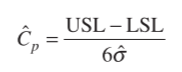

In [71]:
c_p=(USL-LSL)/(6*sigma)
print('$C_p$=',c_p)

$C_p$= 1.0902747492368077


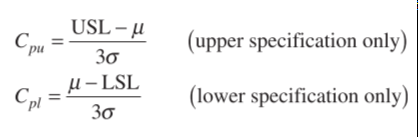

In [72]:
c_p_u=(USL-mu)/(3*sigma)
cpu_l=(mu-LSL)/(3*sigma)
print('$C_{pu}$=',c_p_u)
print('$C_{pl}$=',cpu_l)

$C_{pu}$= 1.1793138537578134
$C_{pl}$= 1.001235644715802


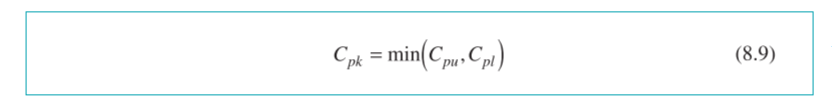

In [73]:

c_p_k=np.min([c_p_u,cpu_l])
print('$C_{pk}$=',c_p_k)

$C_{pk}$= 1.001235644715802


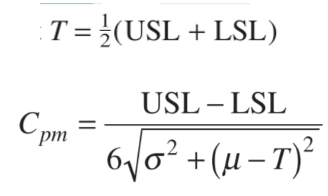

In [74]:
T=0.5*(USL+LSL)
c_p_m=(USL-LSL)/(6*np.sqrt(sigma**2+(T-mu)**2))
print('$C_{pm}$=',c_p_m)

$C_{pm}$= 1.0533432842029218


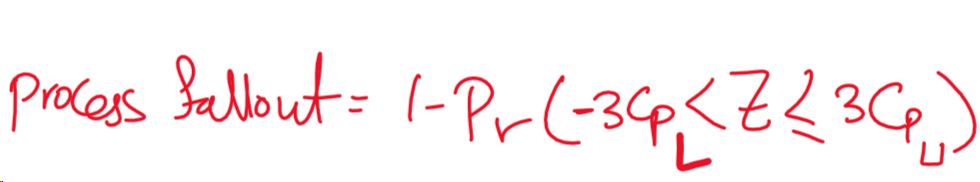


In [75]:
fall_out=(1-(stat.norm.cdf(3*c_p_u,loc=0,scale=1)-stat.norm.cdf(-3*cpu_l,loc=0,scale=1)))*1000000
print(f'fall_out out propbability is  {fall_out} in  ppm')


fall_out out propbability is  1535.1901594268247 in  ppm


In [82]:
x_2 = Chi2LeftTail().ppf(np.array([0,0.001, 0.5, 0.999,1]), dof)

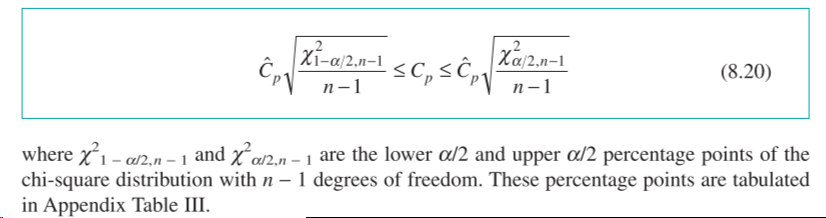
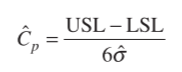

In [85]:
# Scipy  .ppf calculate the righ-tailed quantile
# The formula we have relies cakculating the left-tailed quantile

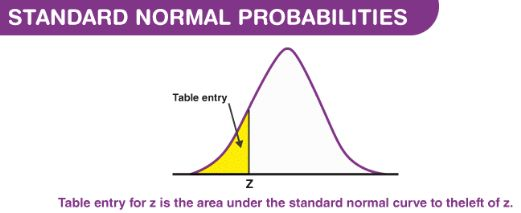
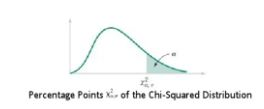

In [86]:
n=150
alhpa=(1-95/100)
dof=n-1
sigma=1.8 #Note that this is different

c_p=(USL-LSL)/(6*sigma)
print('$C_p$=',c_p)
upper_cofidence_limit=c_p*np.sqrt(stat.chi2.ppf(1-alhpa/2,dof)/dof)
lower_cofidence_limit=c_p*np.sqrt(stat.chi2.ppf(alhpa/2,dof)/dof)
print('upper_cofidence_limit=',upper_cofidence_limit)
print('lower_cofidence_limit=',lower_cofidence_limit)

$C_p$= 1.111111111111111
upper_cofidence_limit= 1.2370363651553788
lower_cofidence_limit= 0.9850064250161357


In [87]:
n=150
alhpa=(1-95/100)
dof=n-1
sigma=1.8 #Note that this is different

c_p=(USL-LSL)/(6*sigma)
print('$C_p$=',c_p)
upper_cofidence_limit=c_p*np.sqrt(Chi2LeftTail().ppf(alhpa/2,dof)/dof)
lower_cofidence_limit=c_p*np.sqrt(Chi2LeftTail().ppf(1-alhpa/2,dof)/dof)
print('upper_cofidence_limit=',upper_cofidence_limit)
print('lower_cofidence_limit=',lower_cofidence_limit)

$C_p$= 1.111111111111111
upper_cofidence_limit= 1.2370363651553788
lower_cofidence_limit= 0.9850064250161357


In [88]:
print([f'{1-alhpa},{dof},{Chi2LeftTail().ppf(1-alhpa,dof)}'])

['0.95,149,121.7870456704688']


In [94]:
c_p_o=1.2 #we set our hypothesis to be aganist the claim, so H_0: c_p_o<1.2
c_p_sample=c_p #This is the sample test statistic

UCL_cp=c_p_o*np.sqrt(dof/Chi2LeftTail().ppf(1-alhpa,dof)) #Note that this is a single sided test and this is the UCL for the null hypothesis 
print('UCL_cp=',UCL_cp)

if c_p_sample<UCL_cp:
    print('We fail to reject ("accept !") the null hypothesis')
else:
    print('We reject the null hypothesis')

UCL_cp= 1.3273144809214583
We fail to reject ("accept !") the null hypothesis


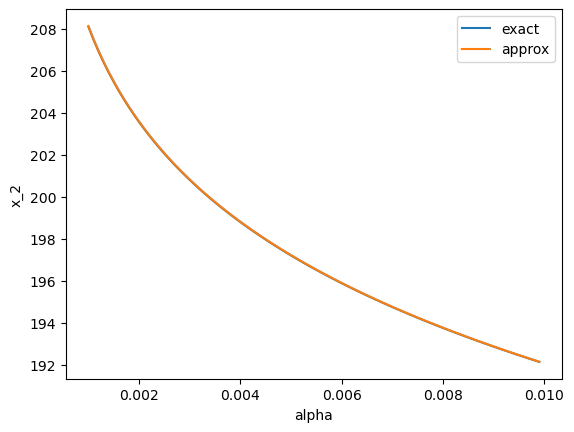

In [95]:
x_2_exact_list=[]
x_2_approx_list=[]
alpha_list=np.arange(0.001,0.01,0.0001)
for alpha in alpha_list:
    x_2_exact=Chi2LeftTail().ppf(alpha,dof)
    x_2_approx=dof*(1-(2/(9*dof))+stat.norm.ppf(1-alpha)*np.sqrt(2/(9*dof)))**3 # This fourmula the approx formula for the chi2 distribution for the tutorial, it is left tailed ppf
    x_2_exact_list.append(x_2_exact)
    x_2_approx_list.append(x_2_approx)
plt.plot(alpha_list,x_2_exact_list)
plt.plot(alpha_list,x_2_approx_list)
plt.xlabel('alpha')
plt.ylabel('x_2')
plt.legend(['exact','approx'])
plt.show()

# 304 Winter 2022 OLD Code 

In [40]:
# Q7 and Q9
![image-3.png](attachment:image-3.png)
![image-4.png](attachment:image-4.png)

'[image-3.png]' is not recognized as an internal or external command,
operable program or batch file.
'[image-4.png]' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
def AppendixVI(n,factor=['A','n','A','A2','A3','c4','1/c4','B3','B4','B5','B6','d2','1/d2','d3','D1','D2','D3','D4'][-4]):
    '''
    Just an alternative for looking up the table
    n: sample size
    factor: factor to be checked at n 
    '''
    AppendixVI=pd.read_csv('AppendixVI.csv',index_col='n')
    return AppendixVI[factor][n]

# Q1 to Q2
Q1, Q2 and Q3 are all from problem set #5

In [42]:
df = pd.read_csv('10 data.csv').dropna()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '10 data.csv'

The number of samples is 20
Samples size is 4
The centeral limit for the R chart is 6.25
The upper limit for the R chart is 14.2625
The upper limit for the R chart is 0.0


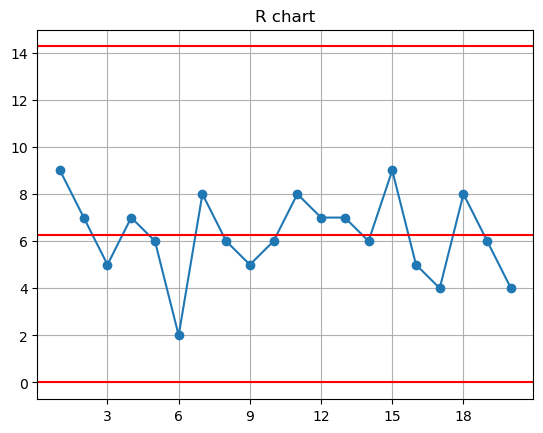

In [ ]:
X_bar=df.groupby(['Sample']).mean() #Each sample Mean
X_R=df.groupby(['Sample']).max()-df.groupby(['Sample']).min() #Each sample Range
m=len(X_R) #number of samples
n=len(df[df['Sample']==1]) #sample size, we are assuming all samples have the same size

CL_R=X_R.mean().item()
D3=AppendixVI(n=n,factor='D3')
D4=AppendixVI(n=n,factor='D4')
R_UCL=D4*CL_R
R_LCL=D3*CL_R
print(f'The number of samples is {m}')
print(f'Samples size is {n}')      
print(f'The centeral limit for the R chart is {CL_R}')
print(f'The upper limit for the R chart is {R_UCL}')
print(f'The upper limit for the R chart is {R_LCL}')
#print(X_R)
ax = plt.figure().gca()
ax.plot(X_R.index,X_R,marker="o")
ax.axhline(y = R_UCL, color = 'r', linestyle = '-')
ax.axhline(y = R_LCL, color = 'r', linestyle = '-')
ax.axhline(y = CL_R, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('R chart')
plt.show()

The number of samples is 20
Samples size is 4
The centeral limit for the Xbar chart is 10.325
The upper limit for the Xbar chart is 14.881249999999998
The upper limit for the Xbar chart is 5.76875


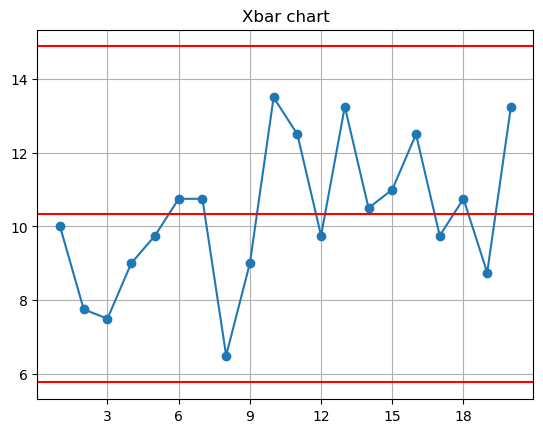

In [ ]:
X_bar=X_bar[(X_R>=R_LCL) & (X_R<=R_UCL)]
m=len(X_bar[X_bar['Vol'].notna()]) #number of samples check this to know if any samples was dropped
#Note that unlike minitab we do not drop the samples out of the bound but we replace them with nan
#Note also how python deals with nan values when taking the mean: np.mean([8,2,nan]) vs pd.DataFrame([8,2,np.nan]).mean()
CL_Xbar=X_bar.mean().item() #Xbar_bar
A2=AppendixVI(n=n,factor='A2')

Xbar_UCL=CL_Xbar+A2*CL_R #Using Rbar(CL_R) from the Rchart
Xbar_LCL=CL_Xbar-A2*CL_R #Using Rbar(CL_R) from the Rchart
print(f'The number of samples is {m}')
print(f'Samples size is {n}')  
print(f'The centeral limit for the Xbar chart is {CL_Xbar}')
print(f'The upper limit for the Xbar chart is {Xbar_UCL}')
print(f'The upper limit for the Xbar chart is {Xbar_LCL}')


ax = plt.figure().gca()
ax.plot(X_bar.index,X_bar,marker="o")
ax.axhline(y = Xbar_UCL, color = 'r', linestyle = '-')
ax.axhline(y = Xbar_LCL, color = 'r', linestyle = '-')
ax.axhline(y = CL_Xbar, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('Xbar chart')
plt.show()

# Q3


In [ ]:
d2=AppendixVI(n=n,factor='d2')
std_pop=CL_R/d2 #Process or population std 
print(f'Estimated Sigma is {std_pop}')

Estimated Sigma is 3.035454103933948


# Q4


In [ ]:
NUTL=CL_Xbar+3*std_pop
NLTL=CL_Xbar-3*std_pop
print(f'The process natural tolerance limits are {NUTL} and {NLTL}')

The process natural tolerance limits are 19.431362311801845 and 1.2186376881981538


# Q5 and Q6


In [ ]:
USL=(352-350)*10
LSL=(348-350)*10
cp=(USL-LSL)/(6*std_pop)
print(f'The process capability ratio is {cp}') #Remeber, the higher than one the more the process capability is 


The process capability ratio is 2.196266666666667


# Q8 and Q10


In [ ]:
cpu=(USL-CL_Xbar)/(3*std_pop)
cpl=(CL_Xbar-LSL)/(3*std_pop)
print(f'The process cpu and cpl are {cpu} and {cpl} respectively')
cpk=np.min([cpu,cpl])
print(f'The process cpk is {cpk}') 

The process cpu and cpl are 1.0624440000000002 and 3.3300893333333335 respectively
The process cpk is 1.0624440000000002


The process is not centered as cpu is not equal to cpl,
so we can use two methods to calculate the fallout,
I solved Q8 before Q7 to show this 

# Q7 and Q9
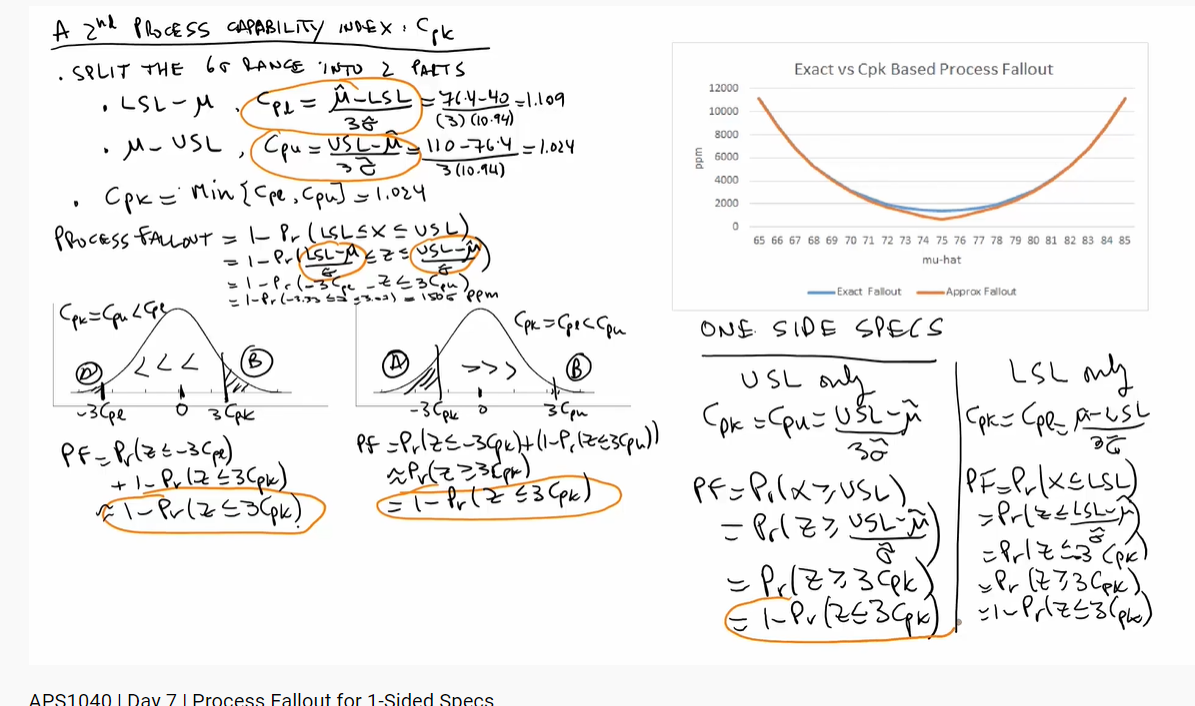
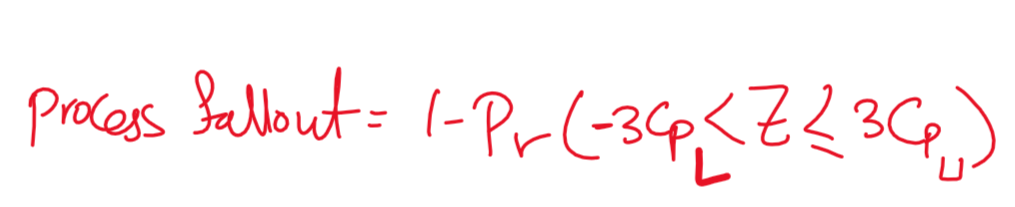

In [ ]:
import scipy.stats as stat
fall_out_approx=(1-stat.norm.cdf(3*cpk,loc=0,scale=1))*1000000
fall_out_exact=(1-(stat.norm.cdf(3*cpu,loc=0,scale=1)-stat.norm.cdf(-3*cpl,loc=0,scale=1)))*1000000
the_ommited_term_in_the_approx=stat.norm.cdf(-3*cpl,loc=0,scale=1)*1000000
print(f'The approx. fall out propbability is {fall_out_approx} in ppm')
print(f'The exact fall out propbability is  {fall_out_exact} in  ppm')
print(f'The omitted term in the approx fall out propbability is {the_ommited_term_in_the_approx} in ppm')

The approx. fall out propbability is 717.9592415318403 in ppm
The exact fall out propbability is  717.9592415318403 in  ppm
The omitted term in the approx fall out propbability is 8.406328510980014e-18 in ppm


# Q11
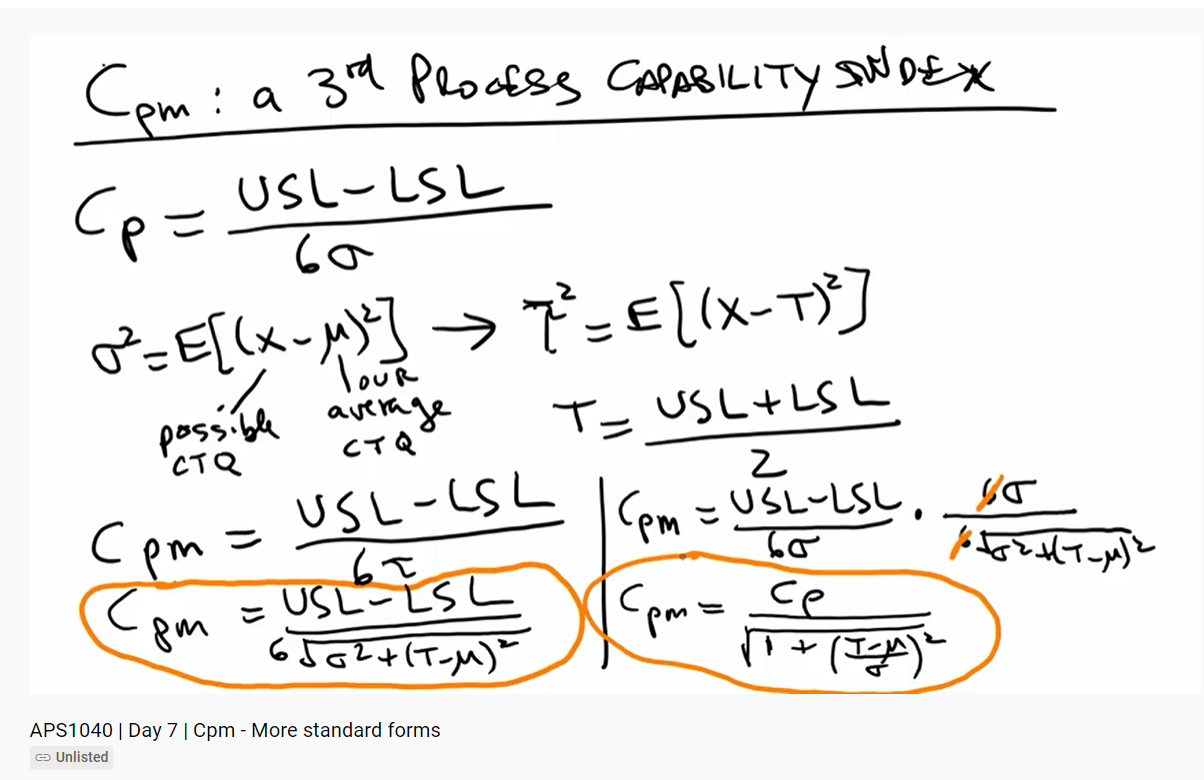

In [ ]:
T=(USL+LSL)/2
cpm=cp/(np.sqrt((1+((T-CL_Xbar)/std_pop)**2)))
print(f'The process cpm is {cpm}') 

The process cpm is 0.6194663187960908
